In [2]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from rgbExclusion import rgbExclusion
%matplotlib inline

ModuleNotFoundError: No module named 'rgbExclusion'

##2.1
Load the set of images and display them as Grayscale and rgb images. You are required to show these images ”inline” rather than creating a new window for every other image. 

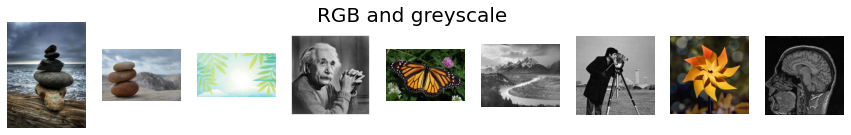

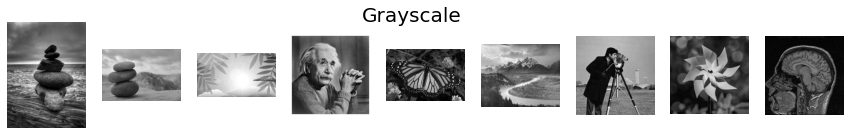

In [10]:
images = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB) for file in glob.glob(".\images\*.*")]

fig = plt.figure(figsize=[15,2])
num = len(images)
for i in range(num):
    a=fig.add_subplot(1,num,i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    fig.suptitle('RGB and greyscale', fontsize=20)

fig = plt.figure(figsize=[15,2])
for i in range(num):
    a=fig.add_subplot(1,num,i+1)
    gray_img = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')
    fig.suptitle('Grayscale', fontsize=20)

##2.2
Implement the function rgbExclusion() in the helper script, in which the input image is decomposed into the three channels: R, G and B and return the image excluding the specified channel. Display the results in notebook.

Text(0.5, 1.0, 'Red Channel excluded')

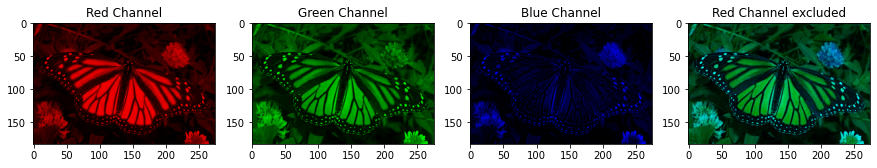

In [19]:
def rgbExclusion(image, channel):
    red_img = np.array(np.zeros(image.shape), dtype='i')
    green_img = np.array(np.zeros(image.shape), dtype='i')
    blue_img = np.array(np.zeros(image.shape), dtype='i')
    #separating channels
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]
    red_img[:,:,0] = red_channel
    green_img[:,:,1] = green_channel
    blue_img[:,:,2] = blue_channel
    #creating a copy so input image doesnt change
    excluded_img = image.copy()
    #excluding specified channel
    if (channel == 'red'):
        excluded_img[:,:,0] = np.zeros([image.shape[0], image.shape[1]])
    elif (channel == 'green'):
        excluded_img[:,:,1] = np.zeros([image.shape[0], image.shape[1]])
    elif (channel == 'blue'):
        excluded_img[:,:,2] = np.zeros([image.shape[0], image.shape[1]])
    return  red_img, green_img, blue_img, excluded_img

red_channel, green_channel, blue_channel, excluded_img = rgbExclusion(images[4], channel='red')

fig = plt.figure(figsize=[15,5])
fig.add_subplot(1,4,1)
plt.imshow(red_channel)
plt.title('Red Channel')
fig.add_subplot(1,4,2)
plt.imshow(green_channel)
plt.title('Green Channel')
fig.add_subplot(1,4,3)
plt.imshow(blue_channel)
plt.title('Blue Channel')
fig.add_subplot(1,4,4)
plt.imshow(excluded_img)
plt.title('Red Channel excluded')

##2.3
Take at-least 3 images from given set and plot histograms before and after applying histogram equalization. Show these image inline format i.e. grayscale image –> display histogram –> apply histogram equalization–> display the equalized image and its histogram.

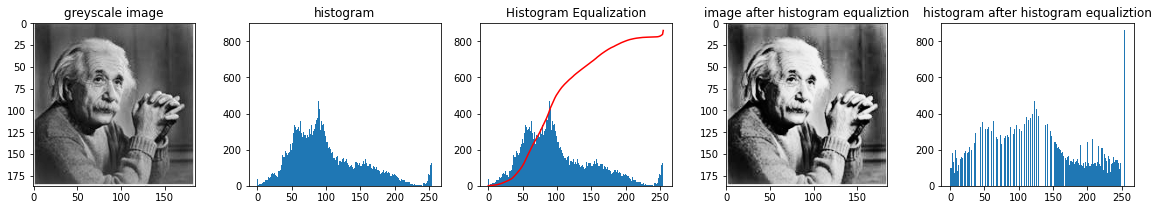

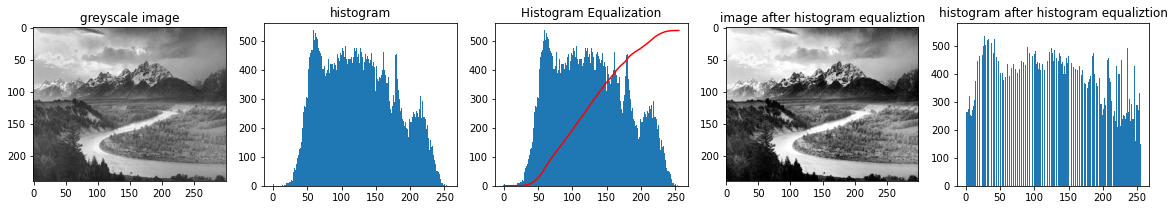

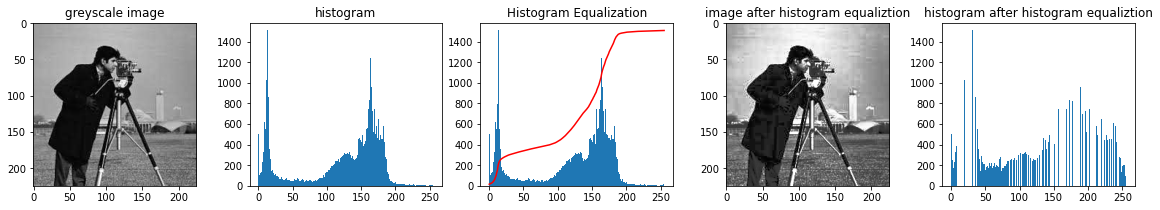

In [20]:
for i in [3, 5, 6]:
    fig = plt.figure(figsize=[20,3])
    #converting into greyscale image
    gray_img = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)
    #plotting greyscale image
    fig.add_subplot(1,5,1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('greyscale image')
    #plotting greyscale image Histogram
    fig.add_subplot(1,5,2)
    hist = plt.hist(gray_img.ravel(),bins=256,range=(0,255))
    plt.title('histogram')
    #cdf
    fig.add_subplot(1,5,3)
    cdf = hist[0].cumsum()
    cdf_normalized = cdf * float(hist[0].max()) / cdf.max()
    hist = plt.hist(gray_img.ravel(),bins=256,range=(0,255))
    plt.plot(cdf_normalized, color = 'r')
    plt.title('Histogram Equalization')
    #plotting greyscale image after histogram equalization 
    fig.add_subplot(1,5,4)
    equ = cv2.equalizeHist(gray_img)
    plt.imshow(equ, cmap='gray')
    plt.title('image after histogram equaliztion')
    #plotting Histogram of greyscale image after histogram equalization
    fig.add_subplot(1,5,5)
    hist = plt.hist(equ.ravel(),bins=256,range=(0,255))
    plt.title('histogram after histogram equaliztion')

### 2.4
You are required to implement the convolution operation from scratch. This function which takes an image and a kernel and returns the convolution of them.
Compare the results of your implemented function with the ones available (built-in) in python packages. You are required to convolve images for sharpening and blurring effects

Text(0.5, 0.98, 'openCV functions')

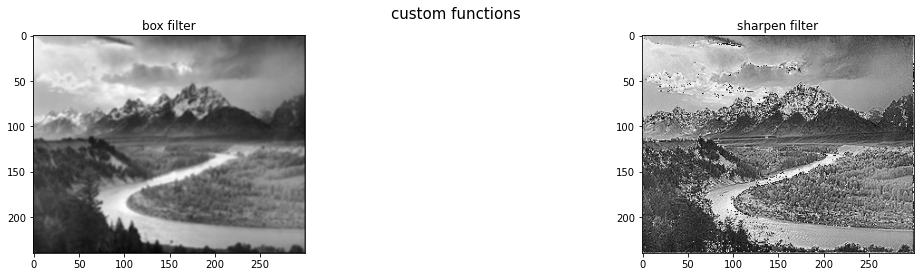

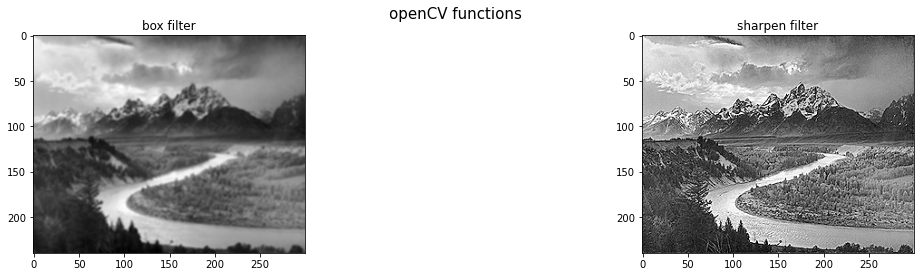

In [26]:
def conv(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    kernel_size = len(kernel)
    output = np.zeros_like(image)
    # zero padding
    image_padded = np.zeros((image.shape[0] + kernel_size-1, image.shape[1] + kernel_size-1))
    image_padded[int(np.floor(kernel_size/2)):-int(np.floor(kernel_size/2)), int(np.floor(kernel_size/2)):-int(np.floor(kernel_size/2))] = image
    # convolotion pixel by pixel iteration
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # multplication and summation
            output[y, x]=(kernel * image_padded[y: y+kernel_size, x: x+kernel_size]).sum()
    return output

kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_box = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
gray_img = cv2.cvtColor(images[5], cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
img = conv(gray_img, kernel_box)
plt.imshow(img, cmap='gray')
plt.title('box filter')
plt.subplot(1,2,2)
img = conv(gray_img, kernel_sharpen)
plt.imshow(img, cmap='gray')
plt.title('sharpen filter')
fig.suptitle('custom functions', fontsize=15)

fig = plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
#using cv2 filters
img = cv2.filter2D(gray_img, -1, kernel_box)
plt.imshow(img, cmap='gray')
plt.title('box filter')
plt.subplot(1,2,2)
img = cv2.filter2D(gray_img, -1, kernel_sharpen)
plt.imshow(img, cmap='gray')
plt.title('sharpen filter')
fig.suptitle('openCV functions', fontsize=15)

##2.5
Load a couple of images from the given set.
1. Apply box filter using convolution, and display the resultant image

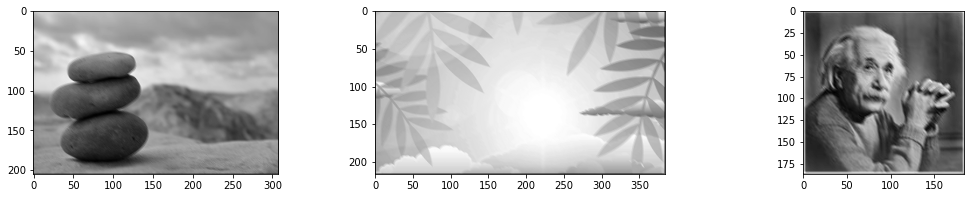

In [30]:
kernel_box = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
fig = plt.figure(figsize=[25,3])
for i in [1, 2, 3]:
    gray_img = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)
    img = conv(gray_img, kernel_box)
    plt.subplot(1,4,i)
    plt.imshow(img, cmap='gray')

2. Apply Gaussian filter to the image, with varying sigma values.

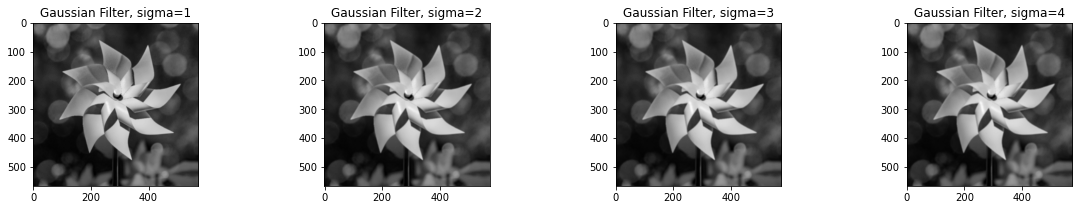

In [34]:
fig = plt.figure(figsize=[20,3])
gray_img = cv2.cvtColor(images[7], cv2.COLOR_RGB2GRAY)
for i in [1,2,3,4]:
    img = cv2.GaussianBlur(gray_img, (5,5),sigmaX=i)
    plt.subplot(1,4,i)
    plt.imshow(img, cmap='gray')
    plt.title("Gaussian Filter, sigma=%i" %i)

3. Add Gausian Noise and Salt and Pepper Noise to them.
4. Apply Gaussian Filter and Median Filters

Text(0.5, 1.0, 'Gaussian Filter, sigma=2')

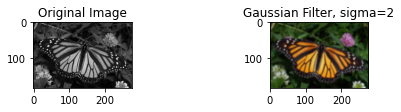

In [38]:
fig = plt.figure()
fig.add_subplot(1, 3, 1)
gray_img = cv2.cvtColor(images[4], cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img,cmap='gray')
plt.title("Original Image")

fig.add_subplot(1, 3, 3)
filtered_img = cv2.GaussianBlur(images[4], (5,5),sigmaX=2)
plt.imshow(filtered_img,cmap='gray')
plt.title("Gaussian Filter, sigma=2")

##2.6
Load a few images from the given set.
1. Apply Sobel operator, computer gradient magnitude and display the results (original image, gradient images and gradient magnitude image).

Text(0.5, 1.0, 'Sobel Gradient Magnitude Image)')

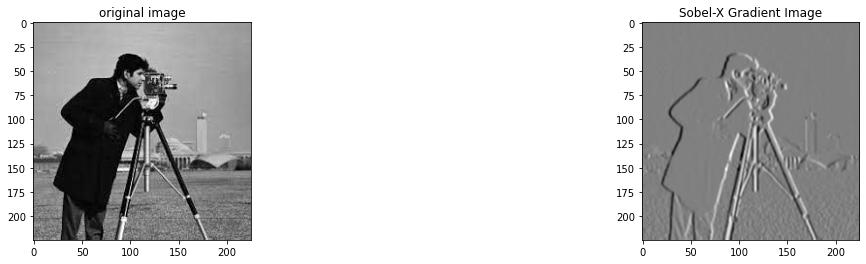

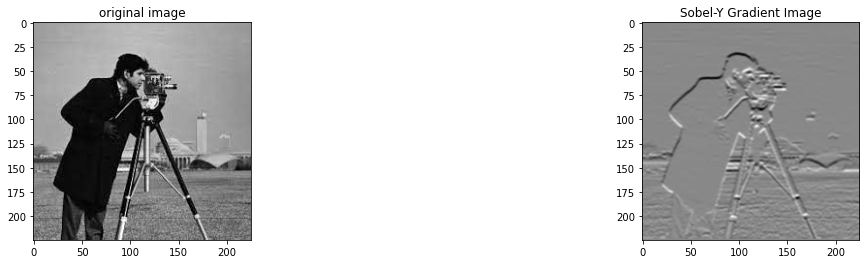

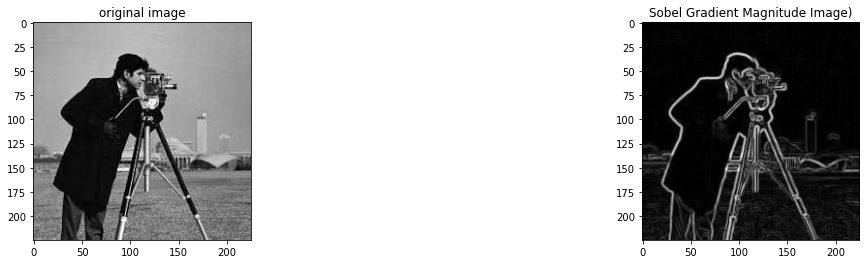

In [41]:
gray_img = cv2.cvtColor(images[6], cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('original image')
plt.subplot(1,2,2)
SobelX = cv2.Sobel(gray_img,cv2.CV_64F,1,0,ksize=5)
plt.imshow(SobelX, cmap='gray')
plt.title('Sobel-X Gradient Image')

fig = plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('original image')
plt.subplot(1,2,2)
SobelY = cv2.Sobel(gray_img,cv2.CV_64F,0,1,ksize=5)
plt.imshow(SobelY, cmap='gray')
plt.title('Sobel-Y Gradient Image')

fig = plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('original image')
plt.subplot(1,2,2)
sobel=np.hypot(SobelX,SobelY)
plt.imshow(sobel,cmap='gray')
plt.title('Sobel Gradient Magnitude Image)')

2. Apply Laplacian of Gaussian, computer laplacian magnitude and display the results (original image, filtered images and laplacian magnitude image). Try different filter kernel coeffcients.

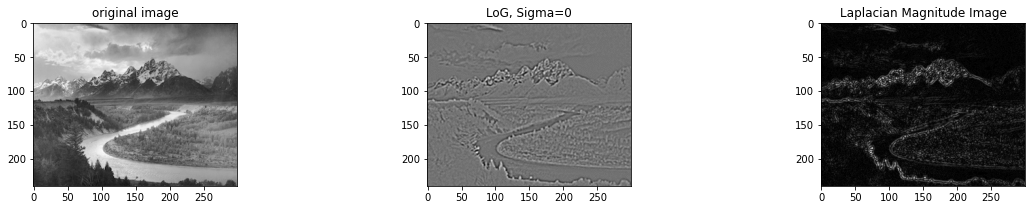

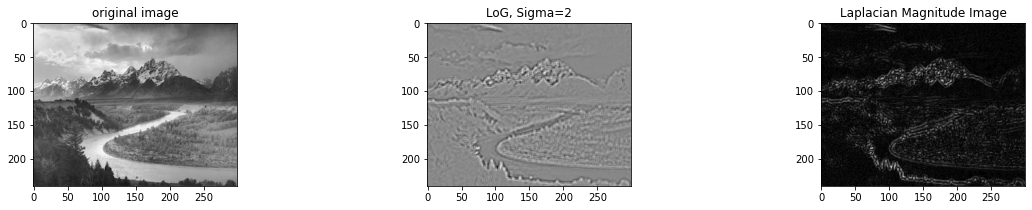

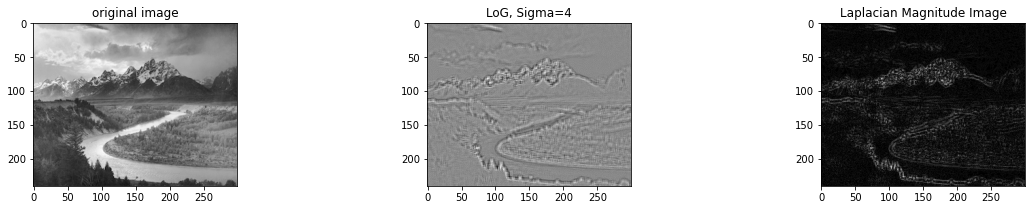

In [43]:
for i in [0,2,4]:
    fig = plt.figure(figsize=[20,3])
    #origional greyscale image
    plt.subplot(1,3,1)
    gray_img = cv2.cvtColor(images[5], cv2.COLOR_RGB2GRAY)
    plt.imshow(gray_img, cmap='gray')
    plt.title('original image')
    #applying gaussian kernel 
    plt.subplot(1,3,2)
    gaussian_img = cv2.GaussianBlur(gray_img, (5,5),sigmaX=i)
    #taking leplacian after gaussian filtering
    Laplacian_img = cv2.Laplacian(gaussian_img,cv2.CV_64F)
    plt.imshow(Laplacian_img, cmap='gray')
    plt.title('LoG, Sigma=%i' %i)
    plt.subplot(1,3,3)
    Laplacian_mag = np.uint8(np.absolute(Laplacian_img))
    plt.imshow(Laplacian_mag,cmap='gray')
    plt.title('Laplacian Magnitude Image')

3. Apply Canny Edge Detector and display the results.

Text(0.5, 1.0, 'canny edge detector')

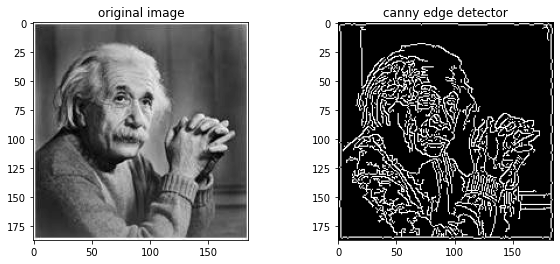

In [52]:
fig = plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
gray_img = cv2.cvtColor(images[3], cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('original image')
plt.subplot(1,2,2)
canny_img = cv2.Canny(gray_img, 60, 170)
plt.imshow(canny_img, cmap='gray')
plt.title('canny edge detector')

##2.7
Implement Canny Edge detector from scratch or use built-in function from python packages,
and apply it on a real time video/stream.

In [53]:
cap = cv2.VideoCapture(0)
while True:
    #capturing frames from camera
    ret, frame = cap.read()
    frame = cv2.GaussianBlur(frame, (5, 5), 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(frame, 30, 100)
    cv2.imshow('Canny Edge', edge)
    #press q to exit
    if cv2.waitKey(20) == ord('q'):  
        break